In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate

In [3]:
datos3=pd.read_csv('Label.csv',header=0)

In [41]:
datos3.shape

(50, 6)

In [19]:
s11=pd.read_csv('S11.csv')

In [23]:
s11.head()

,Freq [MHz],"dB(S(1,1)) [] - Height='0.85meter' L='0.7meter' W='0.8meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.75meter' W='0.8meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.8meter' W='0.8meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.85meter' W='0.8meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.9meter' W='0.8meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.7meter' W='0.85meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.75meter' W='0.85meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.8meter' W='0.85meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.85meter' W='0.85meter'",...,"dB(S(1,1)) [] - Height='0.95meter' L='0.7meter' W='0.95meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.75meter' W='0.95meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.8meter' W='0.95meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.85meter' W='0.95meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.9meter' W='0.95meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.7meter' W='1meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.75meter' W='1meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.8meter' W='1meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.85meter' W='1meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.9meter' W='1meter'"
0,40,-0.220919,-0.244311,-0.295277,-0.459987,-0.612263,-0.192976,-0.249867,-0.376002,-0.398908,...,-0.274362,-0.302862,-0.377228,-0.547158,-0.665485,-0.300634,-0.356517,-0.495958,-0.508282,-0.781715
1,41,-0.252640,-0.279684,-0.338446,-0.533058,-0.713292,-0.218632,-0.284554,-0.432787,-0.460232,...,-0.311292,-0.345713,-0.432013,-0.630277,-0.770234,-0.342036,-0.406576,-0.572342,-0.584993,-0.906446
2,42,-0.289036,-0.320374,-0.388303,-0.618312,-0.831876,-0.247878,-0.324409,-0.498535,-0.531905,...,-0.353470,-0.394592,-0.495141,-0.726874,-0.892759,-0.389190,-0.464014,-0.659166,-0.674352,-1.052544
3,43,-0.330806,-0.367211,-0.446027,-0.717902,-0.971186,-0.281263,-0.370283,-0.574737,-0.615860,...,-0.401781,-0.450541,-0.568160,-0.839247,-1.036262,-0.443006,-0.530047,-0.758175,-0.778649,-1.223882
4,44,-0.378747,-0.421152,-0.513012,-0.834371,-1.134943,-0.319415,-0.423170,-0.663132,-0.714415,...,-0.457235,-0.514754,-0.652885,-0.970058,-1.204509,-0.504517,-0.606070,-0.871412,-0.900599,-1.425023


In [24]:
fs=s11.iloc[:,0]
ste=s11.iloc[:,1]

In [33]:
float(datos3.iloc[0,3])

70.3603

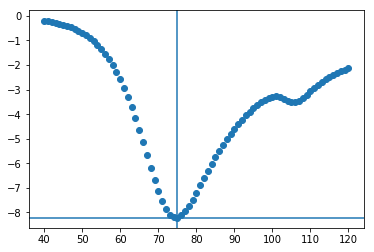

In [39]:
ix=5
fs=s11.iloc[:,0]
ste=s11.iloc[:,ix+1]
plt.scatter(fs,ste)
plt.axhline(datos3.iloc[ix,1])
plt.axvline(datos3.iloc[ix,2])
plt.axvline(float(datos3.iloc[ix,3]))

In [35]:
w3

array(['           70.3603', '           68.2429', '           64.5428',
       '           60.1020', '           57.8866', '               nan',
       '               nan', '           62.8269', '           60.4928',
       '           59.2061', '               nan', '           69.6270',
       '           64.2914', '           60.9433', '           58.0337',
       '           71.7798', '           68.2759', '           63.5119',
       '           59.2829', '           58.8541', '               nan',
       '               nan', '           66.2505', '           61.7923',
       '           58.2339', '           69.4717', '           68.4442',
       '           62.0018', '           61.0360', '           57.4723',
       '           72.5731', '           65.2802', '           63.5994',
       '           59.0599', '           56.5638', '               nan',
       '           66.0496', '           62.1973', '           59.3327',
       '           57.6520', '               nan', 

In [13]:
#leyendo los archivos para label 
w0=datos3.iloc[:,0]
w1=datos3.iloc[:,1]
w2=datos3.iloc[:,2]
w3=datos3.iloc[:,3]

w0=np.array(w0)
w1=np.array(w1)
w2=np.array(w2)
w3=np.array(w3)


In [15]:
BWS11amenos10dB=np.array(w3.min())
BWS11amax10dB=np.array(w3.max())

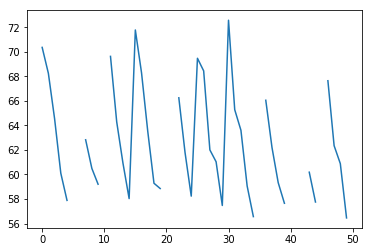

In [18]:
plt.plot(w3)

In [5]:
print BWS11amenos10dB,BWS11amax10dB

1.4196 17.6385


In [37]:
#frecuencia central
S11_ancho=float(w2)+(float(w3)/2)
S11_ancho=np.array(S11_ancho)
zS11=np.arange(0,len(w3),1)

TypeError: only length-1 arrays can be converted to Python scalars

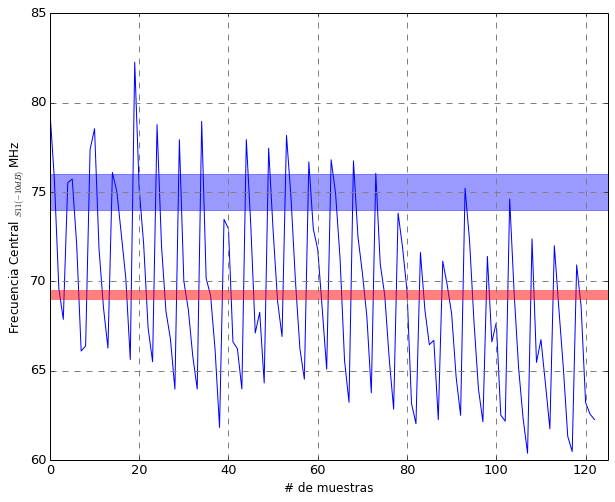

In [7]:
plt.figure(figsize=(10,8))
plt.plot(zS11,S11_ancho,label='1')
# Banda vertical de color 
# y 30% de transparencia
plt.axhspan(74, 76, alpha=0.4, color='b')
plt.axhline(np.average(S11_ancho), color='r',xmin=0, xmax=123,alpha=0.5,linewidth = 10)
#plt.legend(loc = 4,prop={'size': 20})
plt.ylabel(r'Frecuencia Central $_{S11(-10 dB)}$ MHz',fontsize=12)
plt.xlabel('# de muestras',fontsize=12)
plt.xlim(0,125)
#plt.title('Figura de Merito')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
plt.show
plt.savefig('BWS11')

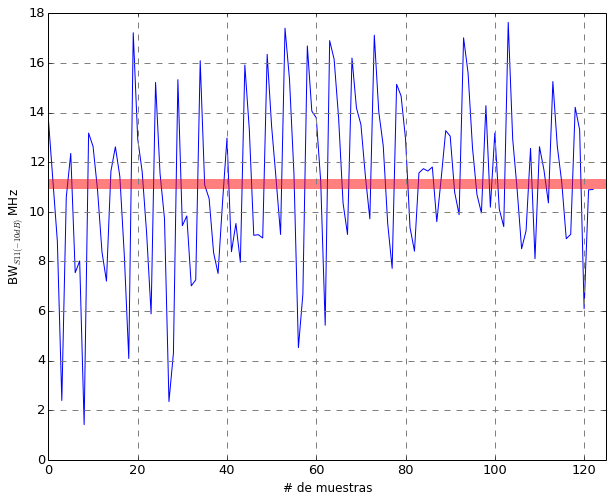

In [8]:
plt.figure(figsize=(10,8))
plt.plot(zS11,w3,label='1')
# Banda vertical de color 
# y 30% de transparencia
#plt.axhspan(10, 12, alpha=0.4, color='b')
plt.axhline(np.average(w3), color='r',xmin=0, xmax=123,alpha=0.5,linewidth = 10)
#plt.legend(loc = 4,prop={'size': 20})
plt.ylabel(r'BW$_{S11 (-10 dB)}$ MHz',fontsize=12)
plt.xlabel('# de muestras',fontsize=12)
plt.xlim(0,125)
#plt.title('Figura de Merito')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
plt.show
plt.savefig('BWPromedio')

In [9]:
promedioBW=np.average(w3)
print promedioBW

11.1290398374


In [10]:
resultado1=[]
resultado2=[]
resultado3=[]
for i in w3:
    su=0.6*((i-20)/20)**2
    resultado1.append(su) 
for j in S11_ancho:
    su=0.4*((j-75)/75)**2
    resultado2.append(su)
#for k in w4:
#    su=(sigmamedia_0/(k))
#    resultado30.append(su)
resultado1=np.array(resultado1)
resultado2=np.array(resultado2)
#resultado30=np.array(resultado30)
Figura_Merito_Final=np.array(resultado1+resultado2)
print Figura_Merito_Final
print 

[ 0.06068516  0.11460707  0.18995647  0.46869219  0.13268073  0.0877199
  0.23330349  0.22102523  0.52313346  0.07029174  0.0822422   0.12540859
  0.20558534  0.25098921  0.10500735  0.08168996  0.11078655  0.20908307
  0.38624974  0.01535066  0.07471236  0.10607132  0.18127514  0.30527789
  0.03531614  0.10781473  0.16156015  0.47217158  0.37858279  0.03335492
  0.16905937  0.15816955  0.25899179  0.25226332  0.02401098  0.12100385
  0.13686464  0.20910569  0.2462383   0.13885136  0.07433858  0.2072026
  0.16994856  0.2259424   0.02561424  0.06723257  0.18426181  0.18216582
  0.19141891  0.02042363  0.06479557  0.1158827   0.18335982  0.01082702
  0.03248999  0.1090885   0.36487706  0.27388053  0.01664747  0.05319494
  0.05858566  0.11903446  0.32565693  0.01461739  0.02224955  0.05869244
  0.14589432  0.18856207  0.02186177  0.05108548  0.06445164  0.11320713
  0.16763369  0.01248761  0.0545706   0.08302573  0.17053927  0.23679053
  0.03550108  0.04328463  0.07710015  0.17946186  0.2

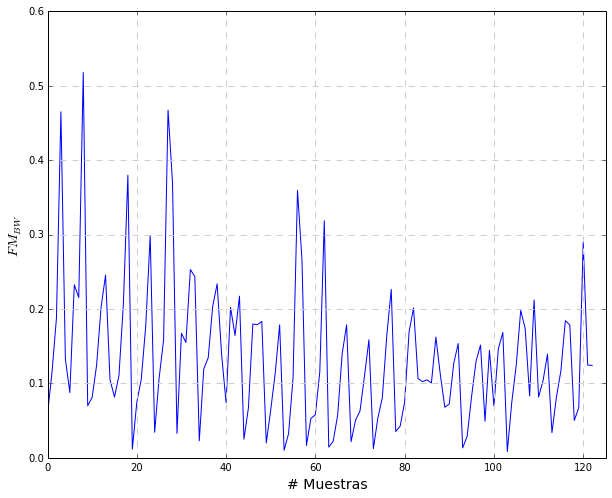

In [11]:
plt.figure(figsize=(10,8))
plt.plot(zS11,resultado1)
plt.ylabel(r'$FM_{BW}$',fontsize=14)
plt.xlabel('# Muestras',fontsize=14)
plt.xlim(0,125)
#plt.title(r'Figura merito BW$_{-10 dB}$')
plt.tick_params(axis='both', which='', labelsize=14)
plt.grid(True)
plt.grid(color = '0.8', linestyle = '--', linewidth = 1)
plt.show
plt.savefig('Nueva figura de merito BW')

In [12]:
minimoFMBW=np.min(resultado1)
print minimoFMBW

0.008365023375


In [13]:
minimoFMFN=np.min(Figura_Merito_Final)
print minimoFMFN

0.0083762339494


In [14]:
Seleccion_minimo_FMFN=np.where(Figura_Merito_Final<=0.015)
print Seleccion_minimo_FMFN

FCfinal=[]
BWfinal=[]
Confifinal=[]
muestrafinal=[]
for i in Seleccion_minimo_FMFN:
    filtro=S11_ancho[i]
    FCfinal.append(filtro)
    print filtro
for i in Seleccion_minimo_FMFN:
    filtro=w3[i]
    BWfinal.append(filtro)
    print filtro
for i in Seleccion_minimo_FMFN:
    filtro=w0[i]
    Confifinal.append(filtro)
    print filtro
for i in Seleccion_minimo_FMFN:
    filtro=Figura_Merito_Final[i]
    muestrafinal.append(filtro)
    print filtro

(array([ 53,  63,  73,  93, 103]),)
[ 78.1711   76.80315  76.04705  75.20775  74.60295]
[ 17.4036  16.9031  17.1237  17.0161  17.6385]
["1)) Setup1 : Sweep Height='0.6meter' L='0.8meter' W='0.85meter'"
 "1)) Setup1 : Sweep Height='0.6meter' L='0.8meter' W='0.95meter'"
 "1)) Setup1 : Sweep Height='0.65meter' L='0.8meter' W='0.8meter'"
 "1)) Setup1 : Sweep Height='0.65meter' L='0.8meter' W='1meter'"
 "1)) Setup1 : Sweep Height='0.7meter' L='0.8meter' W='0.85meter'"]
[ 0.01082702  0.01461739  0.01248761  0.01335856  0.00837623]
